# Figures for Paper

## SOSE

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import intake
import fsspec
import xmitgcm
from xhistogram.xarray import histogram
from xmitgcm.llcreader.llcmodel import faces_dataset_to_latlon
%matplotlib inline
import gsw
from fastjmd95 import jmd95numba
from fastjmd95 import rho, drhods, drhodt

In [2]:
seaice = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/seaicefiles/seaice_no05.zarr')).load()

In [3]:
wmt_budget_terms = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/wmt_budget_terms/wmt_budget_terms.zarr'))
wmt_budget_terms.load()

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 438)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    R1                    (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_slt                (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R1_th                 (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    R2                    (time, sigma2_bin) float64 1.318e+07 1.318e+07 ... 0.0
    R2_slt                (time, sigma2_bin) float64 1.318e+07 1.318e+07 ... 0.0
    R2_th                 (time, sigma2_bin) float64 1.318e+07 1.318e+07 ... 0.0
    R3                    (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    R3_slt                (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    R3_th                 (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    dVdt                  (time, sigma2_bin) float64 nan nan nan ... 0.0 0.0 0.0
    omega_mix             (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_slt         (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_mix_th          (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_surf            (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_surf_slt        (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_surf_th         (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_total           (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_total_slt       (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_total_th        (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate      (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_slt  (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    omega_trans_rate_th   (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_adv               (time, sigma2_bin) float64 0.0 0.0 0.0 ... 0.0 0.0 0.0
    psi_vel               (time, sigma2_bin) float64 -1.318e+07 ... -0.0

In [4]:
wmt_budget_terms = wmt_budget_terms.sel(time=slice('2006', '2010'))
#omega_total = omega_total.sel(time=slice('2006', '2010'))
#R1 = R1.sel(time=slice('2006', '2010'))

In [5]:
wmt_budget_terms.time

<xarray.DataArray 'time' (time: 366)>
array(['2006-01-01T00:00:00.000000000', '2006-01-06T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', ..., '2010-12-21T00:00:00.000000000',
       '2010-12-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-31
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

In [6]:
seaice.time

<xarray.DataArray 'time' (time: 366)>
array(['2006-01-01T00:00:00.000000000', '2006-01-06T00:00:00.000000000',
       '2006-01-11T00:00:00.000000000', ..., '2010-12-21T00:00:00.000000000',
       '2010-12-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    Z        float32 -5.0
  * time     (time) datetime64[ns] 2006-01-01 2006-01-06 ... 2010-12-31
Attributes:
    axis:           T
    long_name:      Time
    standard_name:  time

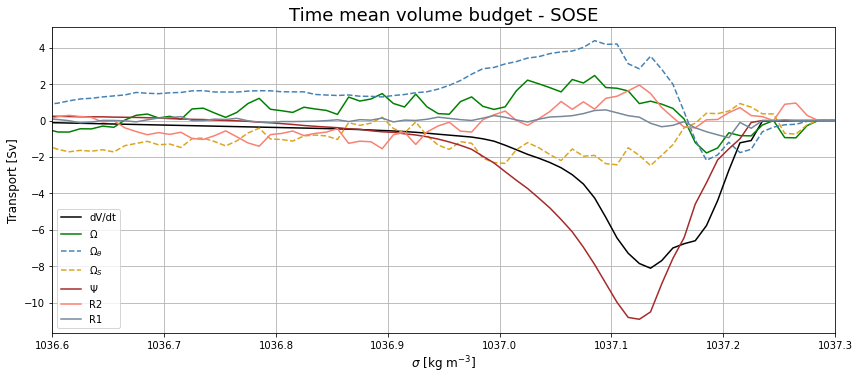

In [7]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(label=r'$\Omega$', color='green')
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue', linestyle='dashed')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod', linestyle='dashed')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
plt.xlim(1036.6, 1037.3)
#plt.ylim(-12, 12)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Time mean volume budget - SOSE', fontsize=18);

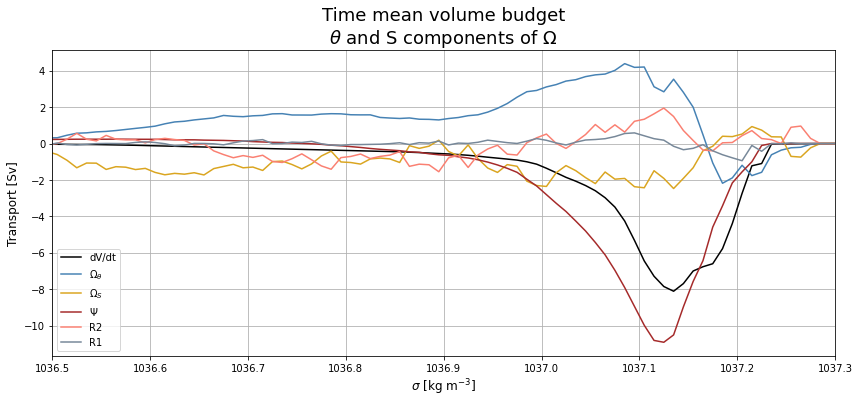

In [8]:
(wmt_budget_terms.dVdt/1e6).mean(dim='time').plot(label='dV/dt', color='k', figsize=(12,5))
(wmt_budget_terms.omega_trans_rate_th/1e6).mean(dim='time').plot(label=r'$\Omega_{\theta}$', color='steelblue')
(wmt_budget_terms.omega_trans_rate_slt/1e6).mean(dim='time').plot(label=r'$\Omega_S$', color='goldenrod')
(wmt_budget_terms.psi_vel/1e6).mean(dim='time').plot(label=r'$\Psi$', color='brown')
(wmt_budget_terms.R2/1e6).mean(dim='time').plot(label='R2', color='salmon')
(wmt_budget_terms.R1/1e6).mean(dim='time').plot(label='R1', color='lightslategray')
#(R3[1:-1]/1e6).mean(dim='time').plot(label=r'$R3$', color='mediumspringgreen')
plt.legend()
plt.grid()
#plt.ylim(-12, 12)
plt.xlim(1036.5, 1037.3)
plt.tight_layout()
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title("Time mean volume budget\n" r'$\theta$ and S components of $\Omega$', fontsize=18);

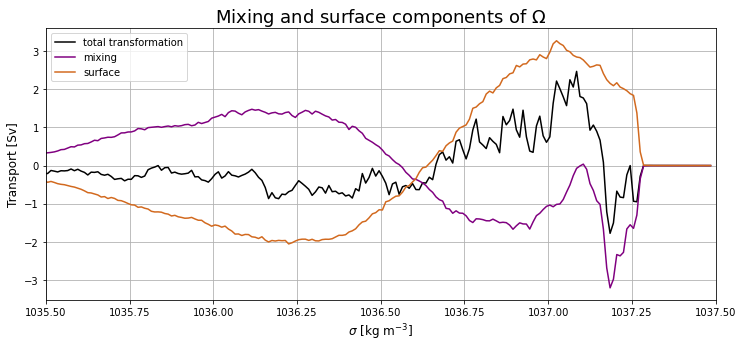

In [9]:
(wmt_budget_terms.omega_trans_rate/1e6).mean(dim='time').plot(figsize=(12,5), label='total transformation', color='k')#, marker='.')
(wmt_budget_terms.omega_mix/1e6).mean(dim='time').plot(label='mixing', color='purple')
(wmt_budget_terms.omega_surf/1e6).mean(dim='time').plot(label='surface', color='chocolate')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-6, 6)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'Mixing and surface components of $\Omega$', fontsize=18);

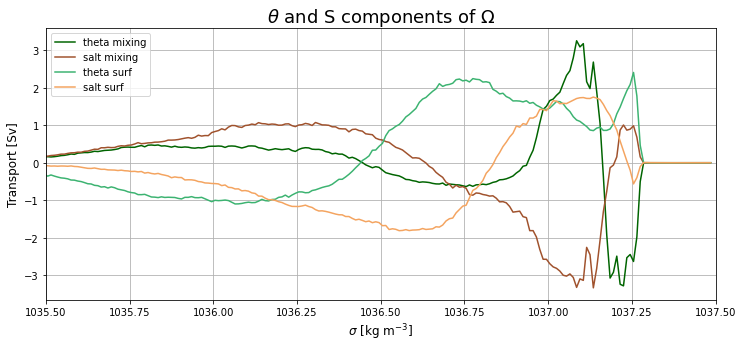

In [10]:
(wmt_budget_terms.omega_mix_th/1e6).mean(dim='time').plot(figsize=(12,5), label='theta mixing', color='darkgreen')
(wmt_budget_terms.omega_mix_slt/1e6).mean(dim='time').plot(label='salt mixing', color='sienna')
(wmt_budget_terms.omega_surf_th/1e6).mean(dim='time').plot(label='theta surf', color='mediumseagreen')
(wmt_budget_terms.omega_surf_slt/1e6).mean(dim='time').plot(label='salt surf', color='sandybrown')
plt.legend()
plt.grid()
plt.xlim(1035.5, 1037.5)
#plt.ylim(-10, 10)
plt.xlabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
plt.ylabel(r'Transport [Sv]', fontsize=12)
plt.title(r'$\theta$ and S components of $\Omega$', fontsize=18);

In [11]:
def anom(da):
    clim = da.groupby('time.month').mean(dim='time')
    anom = da.groupby('time.month') - clim
    #anom_chunk = anom.chunk({'time':12})
    anom_rolled = anom.rolling(time=73).mean(dim='time') #annual rolling mean to remove seasonal cycle
    return anom_rolled

In [12]:
anom_ds = xr.merge([wmt_budget_terms.dVdt.rename('dVdt'), wmt_budget_terms.R1.rename('R1'), 
                    wmt_budget_terms.psi_vel.rename('psi_vel'), wmt_budget_terms.R2.rename('R2'), 
                    wmt_budget_terms.omega_trans_rate.rename('omega_trans_rate'), 
                    wmt_budget_terms.omega_surf_slt.rename('omega_surf_slt'),
                    wmt_budget_terms.omega_surf_th.rename('omega_surf_th'), 
                    wmt_budget_terms.omega_mix.rename('omega_mix')])


In [13]:
def clim(da):
    clim = da.groupby('time.month').mean(dim='time')
    #anom_rolled = anom.rolling(time=12).mean(dim='time')
    return clim

In [14]:
clim_ds = anom_ds

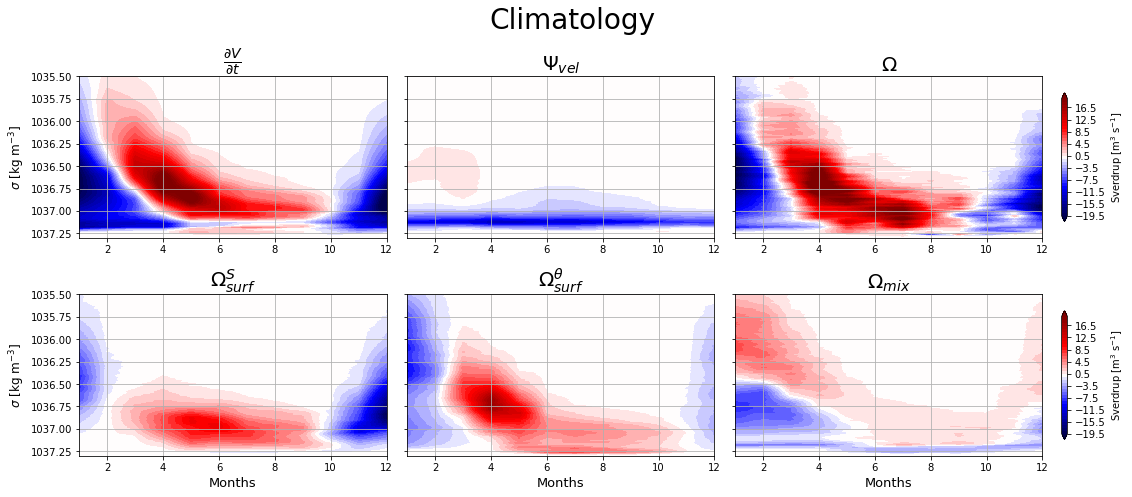

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

levels = np.arange(-20, 20) + 0.5

dVdt_clim = clim(clim_ds.dVdt) / 1e6
c = ax[0,0].contourf(dVdt_clim.month, 
                   dVdt_clim.sigma2_bin, 
                   dVdt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1035.5)
#ax[0,0].set_xlim(xmin='1993')
ax[0,0].grid()

psi_vel_clim = clim(clim_ds.psi_vel) / 1e6
c_psi = ax[0,1].contourf(psi_vel_clim.month, psi_vel_clim.sigma2_bin, psi_vel_clim.T,
                         cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1035.5)
#ax[0,1].set_xlim(xmin='1993')
ax[0,1].grid()

omega_clim = clim(clim_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].contourf(omega_clim.month, omega_clim.sigma2_bin, omega_clim.T,
                           cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1035.5)
#ax[0,2].set_xlim(xmin='1993')
ax[0,2].grid()

omega_surf_slt_clim = clim(clim_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].contourf(omega_surf_slt_clim.month, 
                                omega_surf_slt_clim.sigma2_bin, 
                                omega_surf_slt_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Months', fontsize=13)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1035.5)
#ax[1,0].set_xlim(xmin='1993')
ax[1,0].grid()

omega_surf_th_clim = clim(clim_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].contourf(omega_surf_th_clim.month, omega_surf_th_clim.sigma2_bin, 
                        omega_surf_th_clim.T, cmap='seismic', levels=levels, extend='both')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Months', fontsize=13)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1035.5)
#ax[1,1].set_xlim(xmin='1993')
ax[1,1].grid()

omega_mix__clim = clim(clim_ds.omega_mix) / 1e6
c_mix = ax[1,2].contourf(omega_mix__clim.month, omega_mix__clim.sigma2_bin, omega_mix__clim.T, 
                        cmap='seismic', levels=levels, extend='both')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Months', fontsize=13)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1035.5)
#ax[1,2].set_xlim(xmin='1993')
ax[1,2].grid()

plt.suptitle('Climatology', fontsize=28)
plt.tight_layout();

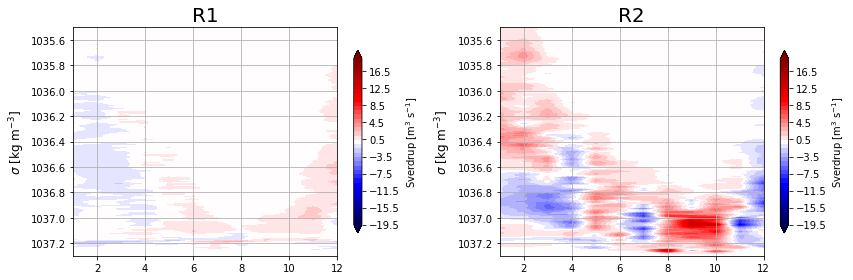

In [16]:
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(12,4))

levels = np.arange(-20, 20) + 0.5

R1_clim = clim(clim_ds.R1) / 1e6
c = ax0.contourf(R1_clim.month, 
                   R1_clim.sigma2_bin, 
                   R1_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax0)
ax0.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax0.set_title('R1', fontsize=20)
ax0.set_ylim(1037.3, 1035.5)
ax0.grid()

R2_clim = clim(clim_ds.R2) / 1e6
c = ax1.contourf(R2_clim.month, 
                   R2_clim.sigma2_bin, 
                   R2_clim.T, cmap='seismic', levels=levels, extend='both')
plt.colorbar(c, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax1)
ax1.set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax1.set_title('R2', fontsize=20)
ax1.set_ylim(1037.3, 1035.5)
ax1.grid()

plt.tight_layout();

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
year_start_index =[0,73, 146, 220, 293]

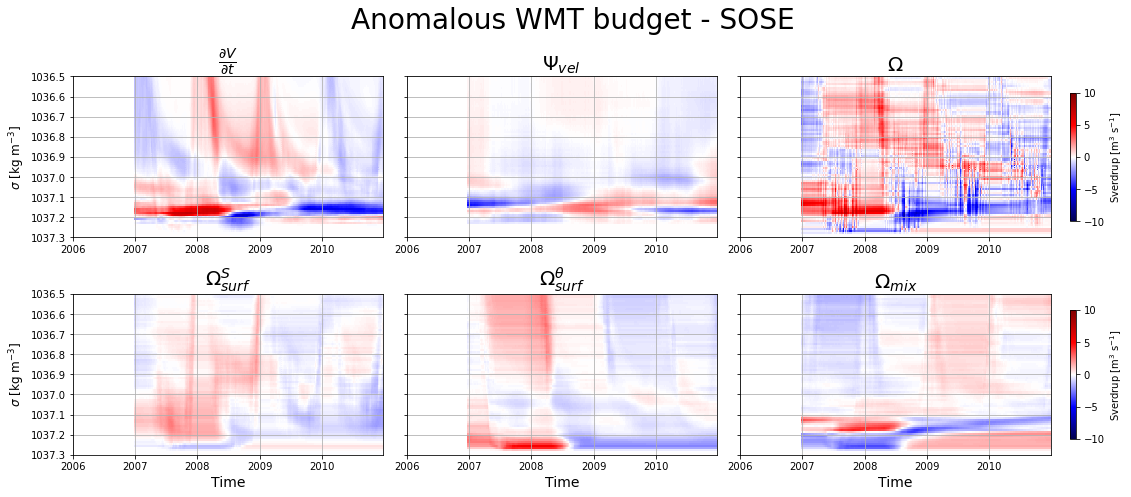

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(16, 7), sharey=True, gridspec_kw={'width_ratios': [2.4,2.4,3]})

dVdt_anom_rolled = anom(anom_ds.dVdt) / 1e6
c = ax[0,0].pcolormesh(dVdt_anom_rolled.time, 
                   dVdt_anom_rolled.sigma2_bin, 
                   dVdt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[0,0])
ax[0,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
#ax[0,0].set_xlabel('Time', fontsize=14)
ax[0,0].set_title(r'$\frac{\partial V}{\partial t}$', fontsize=20)
ax[0,0].set_ylim(1037.3, 1036.5)
ax[0,0].set_xticks(dVdt_anom_rolled.time[year_start_index])
ax[0,0].set_xticklabels(np.arange(2006, 2011))
ax[0,0].grid()

psi_vel_anom_rolled = anom(anom_ds.psi_vel) / 1e6
c_psi = ax[0,1].pcolormesh(psi_vel_anom_rolled.time, psi_vel_anom_rolled.sigma2_bin, psi_vel_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_psi, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[0,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[1,1].set_xlabel('Time', fontsize=14)
ax[0,1].set_title(r'$\Psi_{vel}$', fontsize=20)
ax[0,1].set_ylim(1037.3, 1036.5)
ax[0,1].set_xticks(psi_vel_anom_rolled.time[year_start_index])
ax[0,1].set_xticklabels(np.arange(2006, 2011))
ax[0,1].grid()

omega_anom_rolled = anom(anom_ds.omega_trans_rate) /1e6
c_omega = ax[0,2].pcolormesh(omega_anom_rolled.time, omega_anom_rolled.sigma2_bin, omega_anom_rolled.T,
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_omega, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[0,2])
#ax[0,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
#ax[0,1].set_xlabel('Time', fontsize=14)
ax[0,2].set_title(r'$\Omega$', fontsize=20)
ax[0,2].set_ylim(1037.3, 1036.5)
ax[0,2].set_xticks(omega_anom_rolled.time[year_start_index])
ax[0,2].set_xticklabels(np.arange(2006, 2011))
ax[0,2].grid()

omega_surf_slt_anom_rolled = anom(anom_ds.omega_surf_slt)/1e6
c_surf_slt = ax[1,0].pcolormesh(omega_surf_slt_anom_rolled.time, 
                                omega_surf_slt_anom_rolled.sigma2_bin, 
                                omega_surf_slt_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_slt, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}$]', ax=ax[1,0])
ax[1,0].set_ylabel(r'$\sigma$ [kg m$^{-3}$]', fontsize=12)
ax[1,0].set_xlabel('Time', fontsize=14)
ax[1,0].set_title('$\Omega^{S}_{surf}$', fontsize=20)
ax[1,0].set_ylim(1037.3, 1036.5)
ax[1,0].set_xticks(omega_surf_slt_anom_rolled.time[year_start_index])
ax[1,0].set_xticklabels(np.arange(2006, 2011))
ax[1,0].grid()

omega_surf_th_anom_rolled = anom(anom_ds.omega_surf_th) /1e6
c_surf_th = ax[1,1].pcolormesh(omega_surf_th_anom_rolled.time, omega_surf_th_anom_rolled.sigma2_bin, 
                        omega_surf_th_anom_rolled.T, vmin=-10, vmax=10, cmap='seismic')
#plt.colorbar(c_surf_th, shrink=0.8, label=r'Sverdrup [$\frac{m^3}{s}]$', ax=ax[1,1])
#ax[1,1].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,1].set_xlabel('Time', fontsize=14)
ax[1,1].set_title(r'$\Omega^{\theta}_{surf}$', fontsize=20)
ax[1,1].set_ylim(1037.3, 1036.5)
ax[1,1].set_xticks(omega_surf_th_anom_rolled.time[year_start_index])
ax[1,1].set_xticklabels(np.arange(2006, 2011))
ax[1,1].grid()

omega_mix_anom_rolled = anom(anom_ds.omega_mix) / 1e6
c_mix = ax[1,2].pcolormesh(omega_mix_anom_rolled.time, omega_mix_anom_rolled.sigma2_bin, omega_mix_anom_rolled.T, 
                        vmin=-10, vmax=10, cmap='seismic')
plt.colorbar(c_mix, shrink=0.8, label=r'Sverdrup [m$^3$ s$^{-1}$]', ax=ax[1,2])
#ax[1,2].set_ylabel(r'$\sigma [\frac{kg}{m^3}]$', fontsize=14)
ax[1,2].set_xlabel('Time', fontsize=14)
ax[1,2].set_title(r'$\Omega_{mix}$', fontsize=20)
ax[1,2].set_ylim(1037.3, 1036.5)
ax[1,2].set_xticks(omega_mix_anom_rolled.time[year_start_index])
ax[1,2].set_xticklabels(np.arange(2006, 2011))
ax[1,2].grid()

#ax[2,0].plot(seaice_anom.sum(['XC','YC']))
#ax[2,1].plot(seaice_anom.sum(['XC','YC']))
#ax[2,2].plot(seaice_anom.sum(['XC','YC']))

plt.suptitle('Anomalous WMT budget - SOSE', fontsize=28)
plt.tight_layout();

## Loading in Sea ice, SAM, ENSO timeseries

In [20]:
sose = xr.open_zarr(gcsfs.GCSMap('pangeo-tmp/stb2145/SOSE/datasets/seaicefiles/sose_si_index.zarr'))
sam = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/SAM-index/sam_mo_anom')
enso = xr.open_dataarray('/home/jovyan/WMT-project/Climate-Indices/ENSO-index/oni')

In [21]:
sose_resampled = sose.sose_si_index.resample(time='MS').mean()

In [22]:
sam_sliced = sam.sel(time=slice('2005', '2010')).assign_coords(coords={'time':enso.sel(time=slice('2005', '2010')).time})
sam_sose_time = sam_sliced.groupby('time.year').mean().load()

In [23]:
sam_sliced

<xarray.DataArray (time: 72)>
array([ 0.682308,  1.906154, -0.114462,  3.310154, -0.356308, -0.653538,
       -0.580154,  0.564531,  0.327344, -0.132969,  0.681406, -2.91375 ,
        0.172308, -1.533846,  1.665538, -0.839846,  2.373692,  1.806462,
        1.529846, -2.575469, -0.322656,  1.767031,  0.161406,  1.18625 ,
       -0.357692,  2.676154, -0.764462, -0.479846, -0.926308, -0.893538,
       -2.750154, -0.215469, -1.942656, -0.882969,  0.051406,  2.64625 ,
        2.172308,  1.406154,  0.635538, -0.959846, -0.566308,  2.756462,
        0.149846,  0.664531,  0.397344,  2.187031,  1.051406,  0.85625 ,
        1.632308,  1.256154,  0.505538, -0.579846, -0.046308,  0.296462,
       -0.210154, -2.375469, -0.842656,  1.447031, -1.178594,  0.93625 ,
       -0.787692, -1.803846,  0.045538, -0.069846,  1.603692,  2.896462,
        3.289846,  1.304531, -0.392656,  3.167031,  3.901406,  0.09625 ])
Coordinates:
  * time     (time) datetime64[ns] 2005-01-01 2005-02-01 ... 2010-12-01
    month    (time) int64 ...

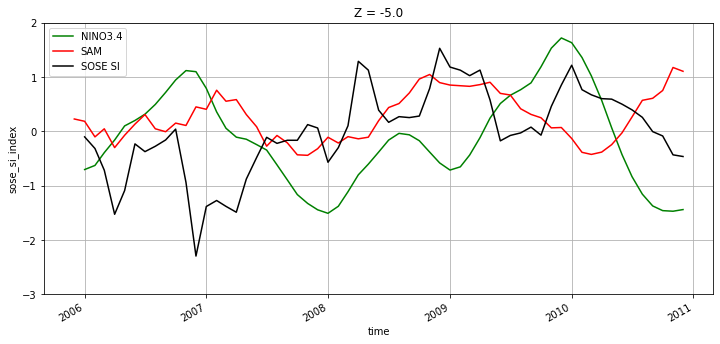

In [24]:
plt.figure(figsize=(12,5))
enso.sel(time=slice('2006', '2010')).plot(color='green', label='NINO3.4')
sam_sliced.rolling(time=12).mean().plot(color='red', label='SAM')
sose_resampled.plot(color='k', label='SOSE SI')
plt.legend()
plt.grid()
plt.ylim(-3,2); #ylims with 12-mth rolling mean
#plt.ylim(-3,4) #ylims without 12-mth rolling mean;
#plt.xlim('2006', '2010');

In [25]:
ENSO = enso.sel(time=slice('2006', '2010'))
SAM = sam_sliced.sel(time=slice('2006', '2010'))
sose_resampled.time

<xarray.DataArray 'time' (time: 60)>
array(['2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01T00:00:00.000000000',
       '2007-05-01T00:00:00.000000000', '2007-06-01T00:00:00.000000000',
       '2007-07-01T00:00:00.000000000', '2007-08-01T00:00:00.000000000',
       '2007-09-01T00:00:00.000000000', '2007-10-01T00:00:00.000000000',
       '2007-11-01T00:00:00.000000000', '2007-12-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-03-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-05-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
    Z        float32 ...

## Water mass classes timeseries

In [26]:
import sys
#telling python where the module lives
sys.path.insert(0, '/home/jovyan/WMT-project/')
from sum_wm_bins import sum_wm_bins

In [27]:
sum_wm_bins?

Signature: sum_wm_bins(da, wm_type)
Docstring:
Sum the bins within a specified water mass class
slice values are from water-masses-defined.ipynb in ECCO dir
File:      ~/WMT-project/sum_wm_bins.py
Type:      function


In [28]:
sum_wm_bins(omega_anom_rolled, 'wssw')

WM TypeError: unspecified water mass type provided. Accepted wm input types: CDW, WSDW, WSBW, ISW


In [29]:
wm_type = ['cdw', 'wsdw', 'wsbw', 'isw']

wmt_terms = [dVdt_anom_rolled, psi_vel_anom_rolled, omega_anom_rolled, omega_surf_slt_anom_rolled,
             omega_surf_th_anom_rolled, omega_mix_anom_rolled]

term_names = ['dVdt_anom_rolled', 'psi_vel_anom_rolled', 'omega_anom_rolled', 'omega_surf_slt_anom_rolled',
             'omega_surf_th_anom_rolled', 'omega_mix_anom_rolled']

In [30]:
def datasetmaker(wm_term):
    """Creating new ds for each wmt budget term with wm classes as variables."""
    new_ds = xr.Dataset({'cdw': sum_wm_bins(wm_term, 'cdw'), 'wsdw':sum_wm_bins(wm_term, 'wsdw'),
                           'wsbw': sum_wm_bins(wm_term, 'wsbw'), 'isw': sum_wm_bins(wm_term, 'isw')}, attrs=dict(Name=wm_term.name))
    return new_ds

In [31]:
wmt_terms[0].name

'dVdt'

In [32]:
term_names[0]

'dVdt_anom_rolled'

In [33]:
k=0
for term in (wmt_terms):
    term_names[k] = datasetmaker(term)
    k=k+1

In [34]:
term_names[0].attrs.get('Name')

'dVdt'

In [35]:
len(term_names)

6

In [36]:
#trying to assign vars with term_names at end of name for each ds in term_names
F"wm_ds_{term_names[5].attrs.get('Name')}" #= term_names[0]

'wm_ds_omega_mix'

In [59]:
term_names[0].std('time')

<xarray.Dataset>
Dimensions:  ()
Data variables:
    cdw      float64 24.26
    wsdw     float64 17.34
    wsbw     float64 2.734
    isw      float64 0.0002677

In [63]:
wm_ds_dVdt = (term_names[0]/term_names[0].std('time')).drop('month')
wm_ds_psi_vel = (term_names[1]/term_names[1].std('time')).drop('month')
wm_ds_omega_trans_rate = (term_names[2]/term_names[2].std('time')).drop('month')
wm_ds_omega_surf_slt = (term_names[3]/term_names[3].std('time')).drop('month')
wm_ds_omega_surf_th = (term_names[4]/term_names[4].std('time')).drop('month')
wm_ds_omega_mix = (term_names[5]/term_names[5].std('time')).drop('month')

## Visualize timeseries of wmt terms in wm classes, [seaice, sam, enso indices]

In [39]:
# For Visualization
import panel as pn
import holoviews as hv
from holoviews import opts
import geoviews as gv

import pandas as pd
import param as pm

## Import hvplot apis for xarray and pandas
import hvplot.xarray
import hvplot.pandas

In [40]:
pn.__version__

'0.10.3'

In [41]:
ENSO.drop('month').sel(time=slice('2006', '2010'))

<xarray.DataArray 'sst' (time: 60)>
array([-0.703412, -0.627783, -0.392023, -0.160018,  0.099242,  0.199537,
        0.314816,  0.494516,  0.716087,  0.944376,  1.116996,  1.096937,
        0.789994,  0.356859,  0.056347, -0.107549, -0.145586, -0.24464 ,
       -0.344647, -0.616876, -0.893393, -1.163648, -1.32647 , -1.443807,
       -1.508408, -1.379251, -1.111469, -0.800557, -0.604031, -0.381658,
       -0.161126, -0.037749, -0.064222, -0.173256, -0.382123, -0.581808,
       -0.712964, -0.653422, -0.436618, -0.116823,  0.241748,  0.511523,
        0.66329 ,  0.765394,  0.891021,  1.186603,  1.529916,  1.717495,
        1.630411,  1.357513,  1.020135,  0.569341,  0.064116, -0.428062,
       -0.833754, -1.156375, -1.372571, -1.459237, -1.470133, -1.439778],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01

In [42]:
SAM.drop('month').rename('zonal mean SLP anom')

<xarray.DataArray 'zonal mean SLP anom' (time: 60)>
array([ 0.172308, -1.533846,  1.665538, -0.839846,  2.373692,  1.806462,
        1.529846, -2.575469, -0.322656,  1.767031,  0.161406,  1.18625 ,
       -0.357692,  2.676154, -0.764462, -0.479846, -0.926308, -0.893538,
       -2.750154, -0.215469, -1.942656, -0.882969,  0.051406,  2.64625 ,
        2.172308,  1.406154,  0.635538, -0.959846, -0.566308,  2.756462,
        0.149846,  0.664531,  0.397344,  2.187031,  1.051406,  0.85625 ,
        1.632308,  1.256154,  0.505538, -0.579846, -0.046308,  0.296462,
       -0.210154, -2.375469, -0.842656,  1.447031, -1.178594,  0.93625 ,
       -0.787692, -1.803846,  0.045538, -0.069846,  1.603692,  2.896462,
        3.289846,  1.304531, -0.392656,  3.167031,  3.901406,  0.09625 ])
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01

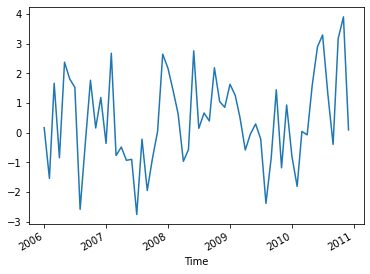

In [43]:
SAM.drop('month').plot()

In [44]:
ENSO.hvplot(x='time')

:Curve   [time]   (sst)

In [45]:
SAM.drop('month').rename('zonal mean SLP anom').hvplot()

:Curve   [time]   (zonal mean SLP anom)

In [65]:
show__dVdt1 = pn.widgets.Checkbox(name='CDW-dVdt')
show__dVdt2 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt3 = pn.widgets.Checkbox(name='WSBW-dVdt')
show__dVdt4 = pn.widgets.Checkbox(name='ISW-dVdt')

dVdt_plot1 = wm_ds_dVdt.cdw.hvplot(ylabel='Sv', title= 'dVdt = Psi + Omega')
dVdt_plot2 = wm_ds_dVdt.wsdw.hvplot()
dVdt_plot3 = wm_ds_dVdt.wsbw.hvplot()
dVdt_plot4 = wm_ds_dVdt.isw.hvplot()

#Psi
show__psi1 = pn.widgets.Checkbox(name='CDW-psi')
show__psi2 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi3 = pn.widgets.Checkbox(name='WSBW-psi')
show__psi4 = pn.widgets.Checkbox(name='ISW-psi')

psi_plot1 = wm_ds_psi_vel.cdw.hvplot()
psi_plot2 = wm_ds_psi_vel.wsdw.hvplot()
psi_plot3 = wm_ds_psi_vel.wsbw.hvplot()
psi_plot4 = wm_ds_psi_vel.isw.hvplot()

#omega
show__omega1 = pn.widgets.Checkbox(name='CDW-omega')
show__omega2 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega3 = pn.widgets.Checkbox(name='WSBW-omega')
show__omega4 = pn.widgets.Checkbox(name='ISW-omega')

omega_plot1 = wm_ds_omega_trans_rate.cdw.hvplot()
omega_plot2 = wm_ds_omega_trans_rate.wsdw.hvplot()
omega_plot3 = wm_ds_omega_trans_rate.wsbw.hvplot()
omega_plot4 = wm_ds_omega_trans_rate.isw.hvplot()

#omega_mix
show__omega_mix1 = pn.widgets.Checkbox(name='CDW-omega_mix')
show__omega_mix2 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix3 = pn.widgets.Checkbox(name='WSBW-omega_mix')
show__omega_mix4 = pn.widgets.Checkbox(name='ISW-omega_mix')

omega_mix_plot1 = wm_ds_omega_mix.cdw.hvplot()
omega_mix_plot2 = wm_ds_omega_mix.wsdw.hvplot()
omega_mix_plot3 = wm_ds_omega_mix.wsbw.hvplot()
omega_mix_plot4 = wm_ds_omega_mix.isw.hvplot()

#omega_surf_slt
show__slt1 = pn.widgets.Checkbox(name='CDW-omega_surf_SLT')
show__slt2 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt3 = pn.widgets.Checkbox(name='WSBW-omega_surf_SLT')
show__slt4 = pn.widgets.Checkbox(name='ISW-omega_surf_SLT')

omega_slt_plot1 = wm_ds_omega_surf_slt.cdw.hvplot()
omega_slt_plot2 = wm_ds_omega_surf_slt.wsdw.hvplot()
omega_slt_plot3 = wm_ds_omega_surf_slt.wsbw.hvplot()
omega_slt_plot4 = wm_ds_omega_surf_slt.isw.hvplot()

#omega_surf_th
show__th1 = pn.widgets.Checkbox(name='CDW-omega_surf_TH')
show__th2 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th3 = pn.widgets.Checkbox(name='WSBW-omega_surf_TH')
show__th4 = pn.widgets.Checkbox(name='ISW-omega_surf_TH')

omega_th_plot1 = wm_ds_omega_surf_th.cdw.hvplot()
omega_th_plot2 = wm_ds_omega_surf_th.wsdw.hvplot()
omega_th_plot3 = wm_ds_omega_surf_th.wsbw.hvplot()
omega_th_plot4 = wm_ds_omega_surf_th.isw.hvplot()

#Indices
show__ENSO = pn.widgets.Checkbox(name='ENSO')
show__SAM = pn.widgets.Checkbox(name='SAM')
show__SOSE = pn.widgets.Checkbox(name='SOSE')

enso_plot = ENSO.drop('month').sel(time=slice('2006', '2010')).hvplot()
sam_plot = SAM.drop('month').rename('zonal mean SLP anom').hvplot()
sose_plot = sose_resampled.drop('Z').hvplot()


@pn.depends(show__dVdt1.param.value, show__dVdt2.param.value, show__dVdt3.param.value, show__dVdt4.param.value,
            show__psi1.param.value, show__psi2.param.value, show__psi3.param.value, show__psi4.param.value,
            show__omega1.param.value, show__omega2.param.value, show__omega3.param.value, show__omega4.param.value,
            show__omega_mix1.param.value, show__omega_mix2.param.value, show__omega_mix3.param.value, show__omega_mix4.param.value,
            show__slt1.param.value, show__slt2.param.value, show__slt3.param.value, show__slt4.param.value,
            show__th1.param.value, show__th2.param.value, show__th3.param.value, show__th4.param.value,
            show__ENSO.param.value, show__SOSE.param.value, show__SAM.param.value)


def get_plot(dVdt1, dVdt2, dVdt3, dVdt4,
             psi1, psi2, psi3, psi4,
             omega1, omega2, omega3, omega4,
             omega_mix1, omega_mix2, omega_mix3, omega_mix4,
             omega_slt1, omega_slt2, omega_slt3, omega_slt4,
             omega_th1, omega_th2, omega_th3, omega_th4, enso, sose, sam):
    return (dVdt_plot1.opts(alpha=0.9*dVdt1)*dVdt_plot2.opts(alpha=0.9*dVdt2)*dVdt_plot3.opts(alpha=0.9*dVdt3)*dVdt_plot4.opts(alpha=0.9*dVdt4)*
            psi_plot1.opts(alpha=0.9*psi1)*psi_plot2.opts(alpha=0.9*psi2)*psi_plot3.opts(alpha=0.9*psi3)*psi_plot4.opts(alpha=0.9*psi4)*
            omega_plot1.opts(alpha=0.9*omega1)*omega_plot2.opts(alpha=0.9*omega2)*
            omega_plot3.opts(alpha=0.9*omega3)*omega_plot4.opts(alpha=0.9*omega4)*
            omega_mix_plot1.opts(alpha=0.9*omega_mix1)*omega_mix_plot2.opts(alpha=0.9*omega_mix2)*
            omega_mix_plot3.opts(alpha=0.9*omega_mix3)*omega_mix_plot4.opts(alpha=0.9*omega_mix4)*
            omega_slt_plot1.opts(alpha=0.9*omega_slt1)*omega_slt_plot2.opts(alpha=0.9*omega_slt2)*
            omega_slt_plot3.opts(alpha=0.9*omega_slt3)*omega_slt_plot4.opts(alpha=0.9*omega_slt4)*
            omega_th_plot1.opts(alpha=0.9*omega_th1)*omega_th_plot2.opts(alpha=0.9*omega_th2)*
            omega_th_plot3.opts(alpha=0.9*omega_th3)*omega_th_plot4.opts(alpha=0.9*omega_th4)*
            enso_plot.opts(alpha=0.9*enso)*sose_plot.opts(alpha=0.9*sose)*sam_plot.opts(alpha=0.9*sam))

In [66]:
pn.Row(pn.Column(show__dVdt1, show__dVdt2, show__dVdt3, show__dVdt4, 
                 show__psi1, show__psi2, show__psi3, show__psi4,
                 show__omega1, show__omega2, show__omega3, show__omega4,
                 show__omega_mix1, show__omega_mix2, show__omega_mix3, show__omega_mix4,
                 show__slt1, show__slt2, show__slt3, show__slt4,
                 show__th1, show__th2, show__th3, show__th4, show__ENSO, show__SOSE, show__SAM,
                 width=150, max_height=250, height_policy='max', scroll=True), 
                 get_plot, scroll=True)

Row(scroll=True)
    [0] Column(height_policy='max', max_height=250, scroll=True, width=150)
        [0] Checkbox(name='CDW-dVdt')
        [1] Checkbox(name='WSBW-dVdt')
        [2] Checkbox(name='WSBW-dVdt')
        [3] Checkbox(name='ISW-dVdt')
        [4] Checkbox(name='CDW-psi')
        [5] Checkbox(name='WSBW-psi')
        [6] Checkbox(name='WSBW-psi')
        [7] Checkbox(name='ISW-psi')
        [8] Checkbox(name='CDW-omega')
        [9] Checkbox(name='WSBW-omega')
        [10] Checkbox(name='WSBW-omega')
        [11] Checkbox(name='ISW-omega')
        [12] Checkbox(name='CDW-omega_mix')
        [13] Checkbox(name='WSBW-omega_mix')
        [14] Checkbox(name='WSBW-omega_mix')
        [15] Checkbox(name='ISW-omega_mix')
        [16] Checkbox(name='CDW-omega_surf_SLT')
        [17] Checkbox(name='WSBW-omega_surf_SLT')
        [18] Checkbox(name='WSBW-omega_surf_SLT')
        [19] Checkbox(name='ISW-omega_surf_SLT')
        [20] Checkbox(name='CDW-omega_surf_TH')
        [21] Checkbox(name='WSBW-omega_surf_TH')
        [22] Checkbox(name='WSBW-omega_surf_TH')
        [23] Checkbox(name='ISW-omega_surf_TH')
        [24] Checkbox(name='ENSO')
        [25] Checkbox(name='SOSE')
        [26] Checkbox(name='SAM')
    [1] ParamFunction(function)

In [48]:
import hvplot.xarray

In [49]:
wm_ds_dVdt.hvplot().opts()

:NdOverlay   [Variable]
   :Curve   [time]   (value)

## Turn wmt terms and indices into dataframes for `pd.corr()` heatmap of correlation matrix

In [70]:
all_terms = [wm_ds_dVdt, wm_ds_psi_vel, wm_ds_omega_trans_rate,
             wm_ds_omega_surf_slt, wm_ds_omega_surf_th, wm_ds_omega_mix]

In [92]:
wm_ds_dVdt.resample(time='MS').mean()

<xarray.Dataset>
Dimensions:  (time: 60)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    cdw      (time) float64 0.0 0.0 0.0 0.0 0.0 ... -1.146 -1.046 -1.082 -0.9565
    wsdw     (time) float64 0.0 0.0 0.0 0.0 ... -1.034 -0.9379 -0.9321 -0.7847
    wsbw     (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.2144 0.2707 0.2176 0.3639
    isw      (time) float64 0.0 0.0 0.0 0.0 ... -3.724e-16 -3.724e-16 -3.724e-16

In [73]:
import pandas as pd

In [112]:
dVdt_df = wm_ds_dVdt.resample(time='MS').mean().to_dataframe()
psi_df = wm_ds_psi_vel.resample(time='MS').mean().to_dataframe()
omega_df = wm_ds_omega_trans_rate.resample(time='MS').mean().to_dataframe()
omega_mix_df = wm_ds_omega_mix.resample(time='MS').mean().to_dataframe()
omega_slt_df = wm_ds_omega_surf_slt.resample(time='MS').mean().to_dataframe()
omega_th_df = wm_ds_omega_surf_th.resample(time='MS').mean().to_dataframe()
dVdt_df.head()

cdw  wsdw  wsbw  isw
time                            
2006-01-01  0.0   0.0   0.0  0.0
2006-02-01  0.0   0.0   0.0  0.0
2006-03-01  0.0   0.0   0.0  0.0
2006-04-01  0.0   0.0   0.0  0.0
2006-05-01  0.0   0.0   0.0  0.0

In [96]:
dVdt_df.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01', '2006-11-01', '2006-12-01',
               '2007-01-01', '2007-02-01', '2007-03-01', '2007-04-01',
               '2007-05-01', '2007-06-01', '2007-07-01', '2007-08-01',
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01', '2008-11-01', '2008-12-01',
               '2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
      

In [85]:
indices = xr.merge([SAM.rename('sam'), ENSO.rename('enso'), sose_resampled.rename('sose')]).drop(['month', 'Z'])
indices

<xarray.Dataset>
Dimensions:  (time: 60)
Coordinates:
  * time     (time) datetime64[ns] 2006-01-01 2006-02-01 ... 2010-12-01
Data variables:
    sam      (time) float64 0.1723 -1.534 1.666 -0.8398 ... 3.167 3.901 0.09625
    enso     (time) float32 -0.7034 -0.6278 -0.392 -0.16 ... -1.459 -1.47 -1.44
    sose     (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [89]:
indices_df = indices.to_dataframe()
indices_df.head()

sam      enso      sose
time                                    
2006-01-01  0.172308 -0.703412 -0.102403
2006-02-01 -1.533846 -0.627783 -0.316302
2006-03-01  1.665538 -0.392023 -0.716384
2006-04-01 -0.839846 -0.160018 -1.526455
2006-05-01  2.373692  0.099242 -1.089656

In [111]:
dVdt_df.tail()

cdw      wsdw      wsbw           isw
time                                                  
2010-08-01 -1.224676 -1.173641  0.194186 -3.723622e-16
2010-09-01 -1.145984 -1.033681  0.214360 -3.723622e-16
2010-10-01 -1.046384 -0.937874  0.270706 -3.723622e-16
2010-11-01 -1.082349 -0.932145  0.217608 -3.723622e-16
2010-12-01 -0.956457 -0.784674  0.363877 -3.723622e-16

In [110]:
indices_df.tail()

sam      enso      sose
time                                    
2010-08-01  1.304531 -1.156375  0.256971
2010-09-01 -0.392656 -1.372571 -0.005690
2010-10-01  3.167031 -1.459237 -0.085412
2010-11-01  3.901406 -1.470133 -0.432815
2010-12-01  0.096250 -1.439778 -0.463637

In [108]:
pd.concat([dVdt_df, indices_df], axis=1).tail()

cdw      wsdw      wsbw           isw       sam      enso  \
time                                                                         
2010-08-01 -1.224676 -1.173641  0.194186 -3.723622e-16  1.304531 -1.156375   
2010-09-01 -1.145984 -1.033681  0.214360 -3.723622e-16 -0.392656 -1.372571   
2010-10-01 -1.046384 -0.937874  0.270706 -3.723622e-16  3.167031 -1.459237   
2010-11-01 -1.082349 -0.932145  0.217608 -3.723622e-16  3.901406 -1.470133   
2010-12-01 -0.956457 -0.784674  0.363877 -3.723622e-16  0.096250 -1.439778   

                sose  
time                  
2010-08-01  0.256971  
2010-09-01 -0.005690  
2010-10-01 -0.085412  
2010-11-01 -0.432815  
2010-12-01 -0.463637

In [113]:
dVdt_ind = pd.concat([dVdt_df, indices_df], axis=1)
psi_ind = pd.concat([psi_df, indices_df], axis=1)
omega_ind = pd.concat([omega_df, indices_df], axis=1)
omega_mix_ind = pd.concat([omega_mix_df, indices_df], axis=1)
omega_slt_ind = pd.concat([omega_slt_df, indices_df], axis=1)
omega_th_ind = pd.concat([omega_th_df, indices_df], axis=1)

In [115]:
omega_th_ind.head()

cdw  wsdw  wsbw  isw       sam      enso      sose
time                                                          
2006-01-01  0.0   0.0   0.0  0.0  0.172308 -0.703412 -0.102403
2006-02-01  0.0   0.0   0.0  0.0 -1.533846 -0.627783 -0.316302
2006-03-01  0.0   0.0   0.0  0.0  1.665538 -0.392023 -0.716384
2006-04-01  0.0   0.0   0.0  0.0 -0.839846 -0.160018 -1.526455
2006-05-01  0.0   0.0   0.0  0.0  2.373692  0.099242 -1.089656

In [117]:
dVdt_corr = dVdt_ind.corr()
psi_corr = psi_ind.corr()
omega_corr = omega_ind.corr()
omega_mix_corr = omega_mix_ind.corr()
omega_slt_corr = omega_slt_ind.corr()
omega_th_corr = omega_th_ind.corr()

### Create heatmap of correlation matrices

In [118]:
import seaborn as sn

ModuleNotFoundError: No module named 'seaborn'